In [32]:
import pandas as pd

# Load the Benin dataset
df = pd.read_csv('../data/togo-dapaong_qc.csv')  # Assuming file is in the data/ folder

# Display first 5 rows to verify
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [33]:
# Summary statistics for all numeric columns
summary_stats = df.describe(include='all')  # 'all' includes both numeric and categorical
summary_stats

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
unique,525600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-10-24 23:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,NaN,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,NaN,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,NaN,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,NaN,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN


In [34]:
# Total missing values per column
missing_values = df.isna().sum()

# Percentage of missing values
missing_percent = (df.isna().mean() * 100).round(2)

# Combine into a readable report
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

# Filter columns with >5% missing values
significant_missing = missing_report[missing_report['Percentage (%)'] > 5]

print("Missing Value Report:")
print(missing_report)
print("\nColumns with >5% missing values:")
print(significant_missing)

Missing Value Report:
               Missing Values  Percentage (%)
Timestamp                   0             0.0
GHI                         0             0.0
DNI                         0             0.0
DHI                         0             0.0
ModA                        0             0.0
ModB                        0             0.0
Tamb                        0             0.0
RH                          0             0.0
WS                          0             0.0
WSgust                      0             0.0
WSstdev                     0             0.0
WD                          0             0.0
WDstdev                     0             0.0
BP                          0             0.0
Cleaning                    0             0.0
Precipitation               0             0.0
TModA                       0             0.0
TModB                       0             0.0
Comments               525600           100.0

Columns with >5% missing values:
          Missing Values

In [35]:
# Convert timestamp if needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Calculate missing value percentages
missing_pct = (df.isna().mean() * 100).round(2)

# For columns with <5% missing, impute with median
cols_to_impute = missing_pct[missing_pct < 5].index
for col in cols_to_impute:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())

# For columns with >5% missing, consider dropping or special treatment
cols_over_5 = missing_pct[missing_pct >= 5].index
print(f"Columns needing special attention: {list(cols_over_5)}")

Columns needing special attention: ['Comments']


In [36]:
from scipy import stats
import numpy as np

# Columns to analyze for outliers
critical_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores and flag outliers
outlier_mask = pd.DataFrame()
for col in critical_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outlier_mask[col] = (z_scores > 3)

# Combine results
total_outliers = outlier_mask.sum()
print("Outliers detected per column:")
print(total_outliers)

Outliers detected per column:
GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


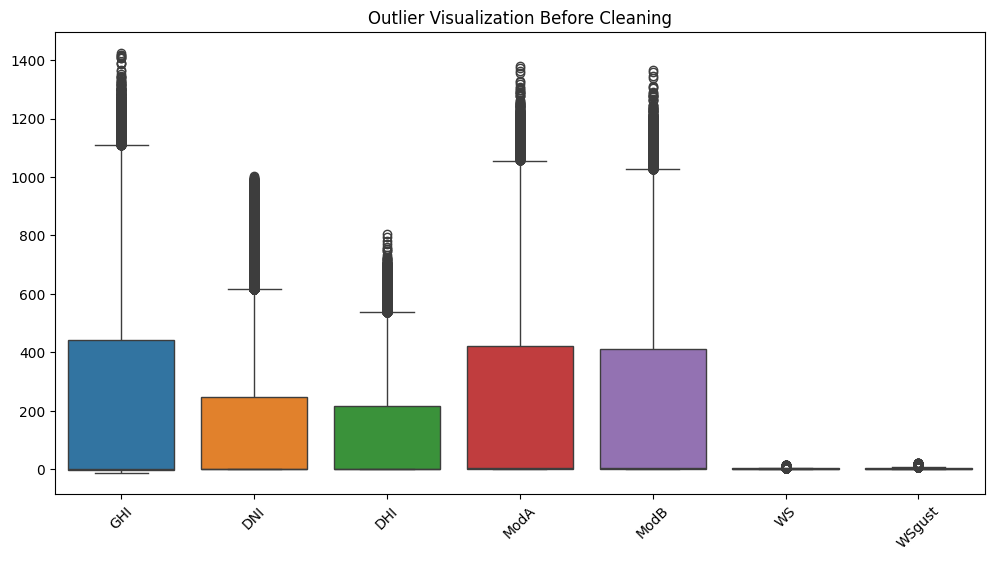

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[critical_cols])
plt.title('Outlier Visualization Before Cleaning')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Option A: Remove outliers
df_clean = df[~outlier_mask.any(axis=1)]

# Option B: Winsorize (cap outliers)
for col in critical_cols:
    upper = df[col].quantile(0.99)
    lower = df[col].quantile(0.01)
    df[col] = np.where(df[col] > upper, upper, 
                      np.where(df[col] < lower, lower, df[col]))

# Fix negative radiation values (physically impossible)
radiation_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
df[radiation_cols] = df[radiation_cols].clip(lower=0)

In [67]:
# Save cleaned data
df_clean.to_csv('../data/togo_clean.csv', index=False)

# Verify .gitignore contains 'data/'
with open('../.gitignore', 'a') as f:
    f.write('\ndata/')  # Add if not present

In [40]:
print("\nCleaning Report:")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Negative values remaining: {(df_clean[radiation_cols] < 0).sum().sum()}")
print("\nSummary stats after cleaning:")
print(df_clean[critical_cols].describe())


Cleaning Report:
Original shape: (525600, 19)
Cleaned shape: (516349, 19)
Negative values remaining: 255872

Summary stats after cleaning:
                 GHI            DNI            DHI           ModA  \
count  516349.000000  516349.000000  516349.000000  516349.000000   
mean      223.859675     147.975931     112.781249     219.380751   
std       317.306277     247.683690     151.571744     311.854841   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         0.500000       0.000000       1.500000       2.800000   
75%       423.200000     237.900000     211.600000     404.100000   
max      1198.000000     904.100000     586.000000    1171.200000   

                ModB             WS         WSgust  
count  516349.000000  516349.000000  516349.000000  
mean      213.028150       2.312185       3.154247  
std       302.625802       1.377997       1.762192  
min         0.000000      

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Set Timestamp as index
df_clean = df_clean.set_index('Timestamp')

# Create time-based features
df_clean['Hour'] = df_clean.index.hour
df_clean['Month'] = df_clean.index.month_name()
df_clean['Day/Night'] = df_clean['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

C:\Users\HP\AppData\Local\Temp\ipykernel_20060\139525204.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_clean, x='Hour', y='GHI', ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_20060\139525204.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_clean, x='Hour', y='DNI', ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_20060\139525204.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_clean, x='Hour', y='Tamb', ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_20060\139525204.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_clean, x='Hour', y='WS', ci=None)


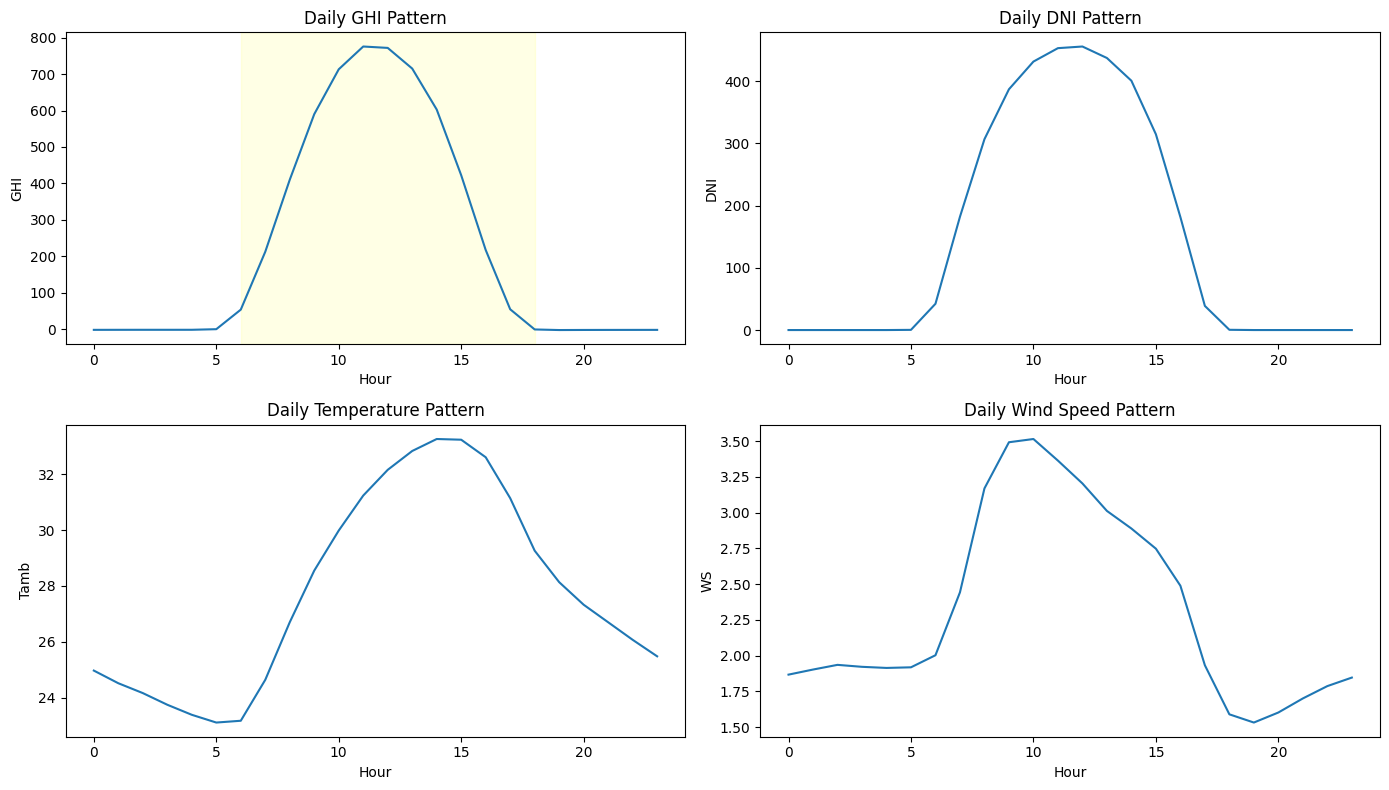

In [42]:
plt.figure(figsize=(14, 8))

# GHI
plt.subplot(2, 2, 1)
sns.lineplot(data=df_clean, x='Hour', y='GHI', ci=None)
plt.title('Daily GHI Pattern')
plt.axvspan(6, 18, color='yellow', alpha=0.1)  # Highlight daylight hours

# DNI
plt.subplot(2, 2, 2)
sns.lineplot(data=df_clean, x='Hour', y='DNI', ci=None)
plt.title('Daily DNI Pattern')

# Temperature
plt.subplot(2, 2, 3)
sns.lineplot(data=df_clean, x='Hour', y='Tamb', ci=None)
plt.title('Daily Temperature Pattern')

# Wind Speed
plt.subplot(2, 2, 4)
sns.lineplot(data=df_clean, x='Hour', y='WS', ci=None)
plt.title('Daily Wind Speed Pattern')

plt.tight_layout()
plt.show()

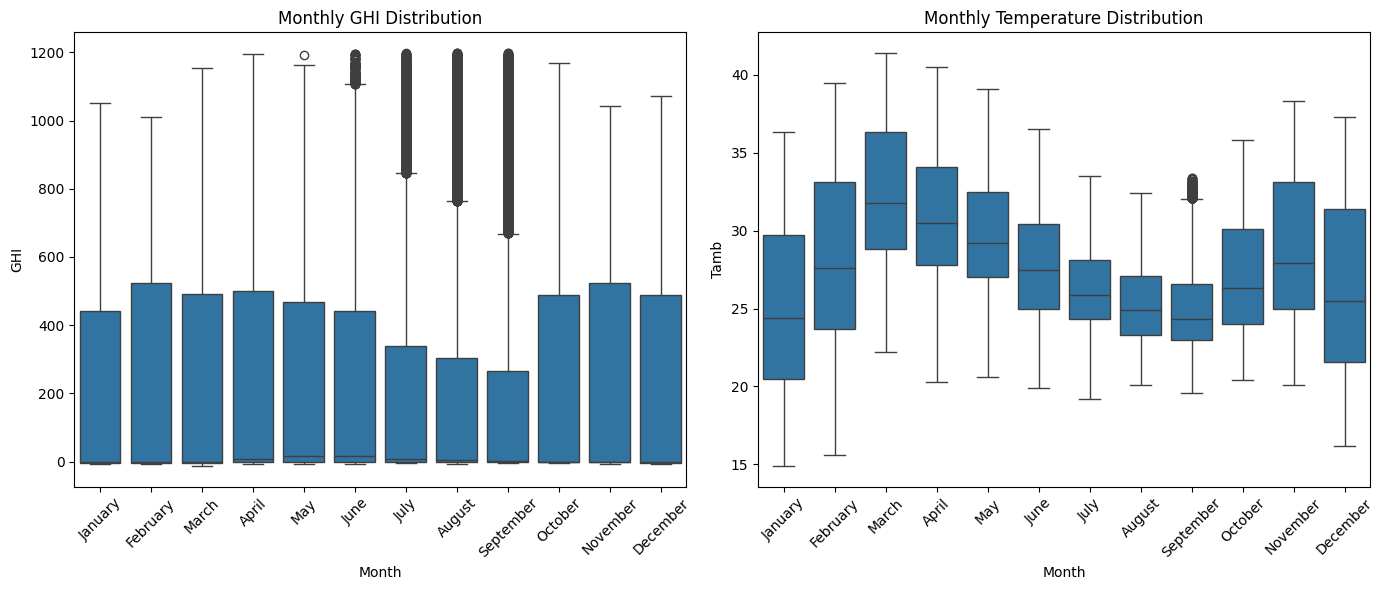

In [43]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 6))

# Monthly GHI
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Month', y='GHI', order=month_order)
plt.title('Monthly GHI Distribution')
plt.xticks(rotation=45)

# Monthly Temperature
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Month', y='Tamb', order=month_order)
plt.title('Monthly Temperature Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

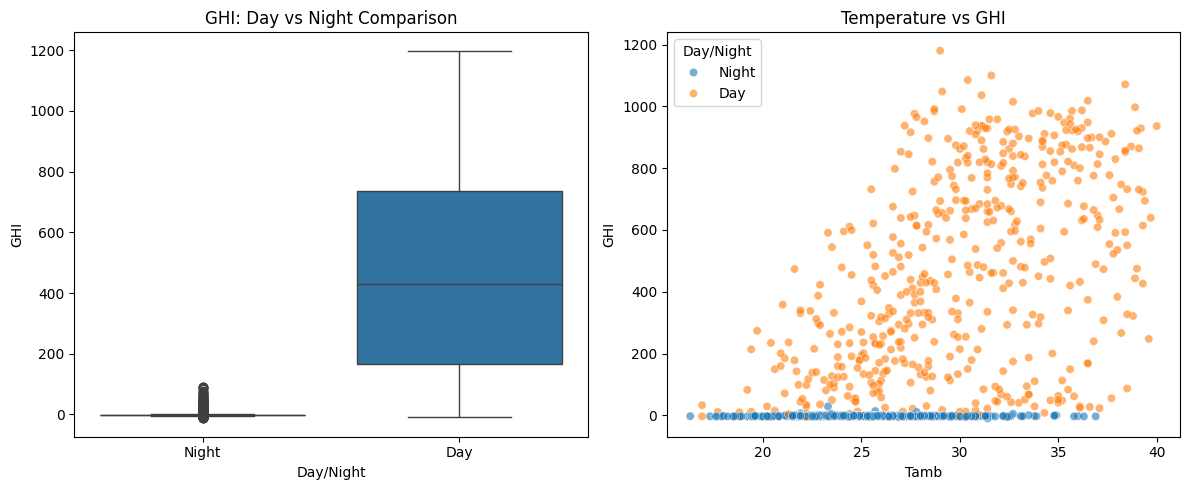

In [44]:
plt.figure(figsize=(12, 5))

# Day vs Night GHI
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Day/Night', y='GHI')
plt.title('GHI: Day vs Night Comparison')

# Temperature vs Radiation
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean.sample(1000), x='Tamb', y='GHI', hue='Day/Night', alpha=0.6)
plt.title('Temperature vs GHI')

plt.tight_layout()
plt.show()

In [45]:
# Convert Cleaning flag to categorical for better plotting
df_clean['Cleaning_Status'] = df_clean['Cleaning'].map({0: 'Pre-Clean', 1: 'Post-Clean'})

# Calculate average module outputs
cleaning_impact = df_clean.groupby('Cleaning_Status')[['ModA', 'ModB']].mean().reset_index()

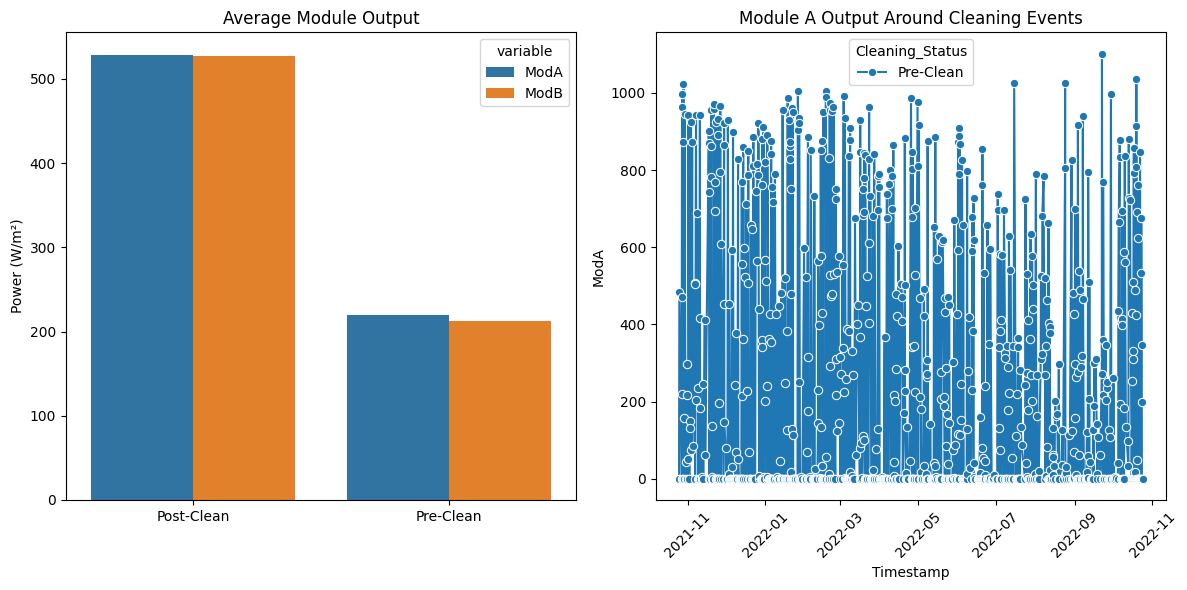

In [46]:
plt.figure(figsize=(12, 6))

# Bar plot comparison
plt.subplot(1, 2, 1)
sns.barplot(data=cleaning_impact.melt(id_vars='Cleaning_Status'), 
            x='Cleaning_Status', y='value', hue='variable')
plt.title('Average Module Output')
plt.ylabel('Power (W/m²)')
plt.xlabel('')

# Time series of cleaning events
plt.subplot(1, 2, 2)
sample_data = df_clean.sample(1000).sort_index()  # Plot subset for clarity
sns.lineplot(data=sample_data, x=sample_data.index, y='ModA', 
             hue=sample_data['Cleaning_Status'], style=sample_data['Cleaning_Status'],
             markers=True, dashes=False)
plt.title('Module A Output Around Cleaning Events')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [47]:
from scipy.stats import ttest_ind

# Compare pre/post-cleaning performance
pre_clean = df_clean[df_clean['Cleaning'] == 0]['ModA']
post_clean = df_clean[df_clean['Cleaning'] == 1]['ModA']

t_stat, p_value = ttest_ind(pre_clean, post_clean, nan_policy='omit')
print(f"Module A Performance Difference: p-value = {p_value:.4f}")
print("Significant difference at 95% confidence level" if p_value < 0.05 else "No significant difference")

Module A Performance Difference: p-value = 0.0000
Significant difference at 95% confidence level


In [48]:
# Calculate days between cleanings
clean_dates = df_clean[df_clean['Cleaning'] == 1].index
cleaning_intervals = np.diff(clean_dates)
print(f"Average cleaning interval: {pd.to_timedelta(cleaning_intervals).mean()}")

Average cleaning interval: 1 days 07:57:38.602941176


In [49]:
df_clean['Days_Since_Clean'] = df_clean.groupby((df_clean['Cleaning'].diff() == 1).cumsum()).cumcount()

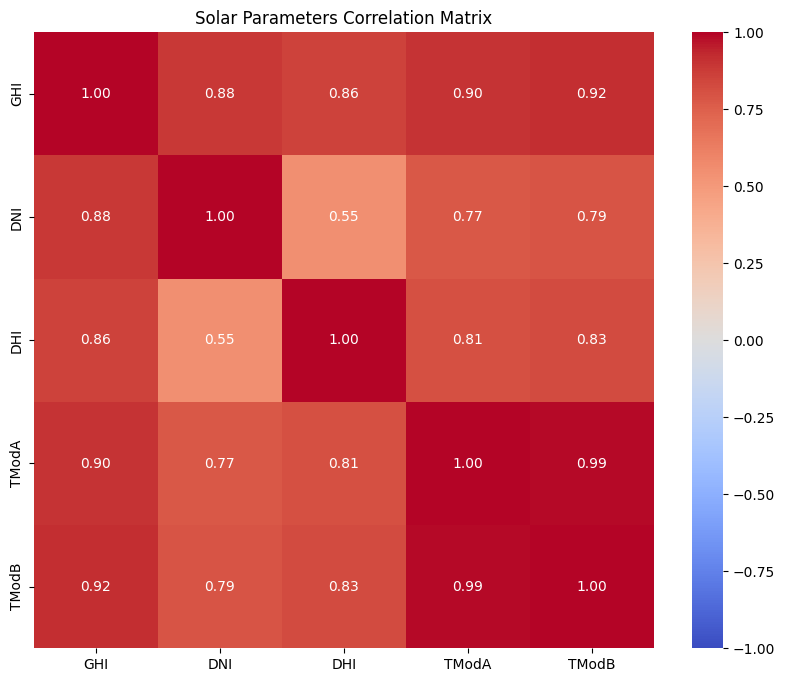

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key variables
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Solar Parameters Correlation Matrix')
plt.show()

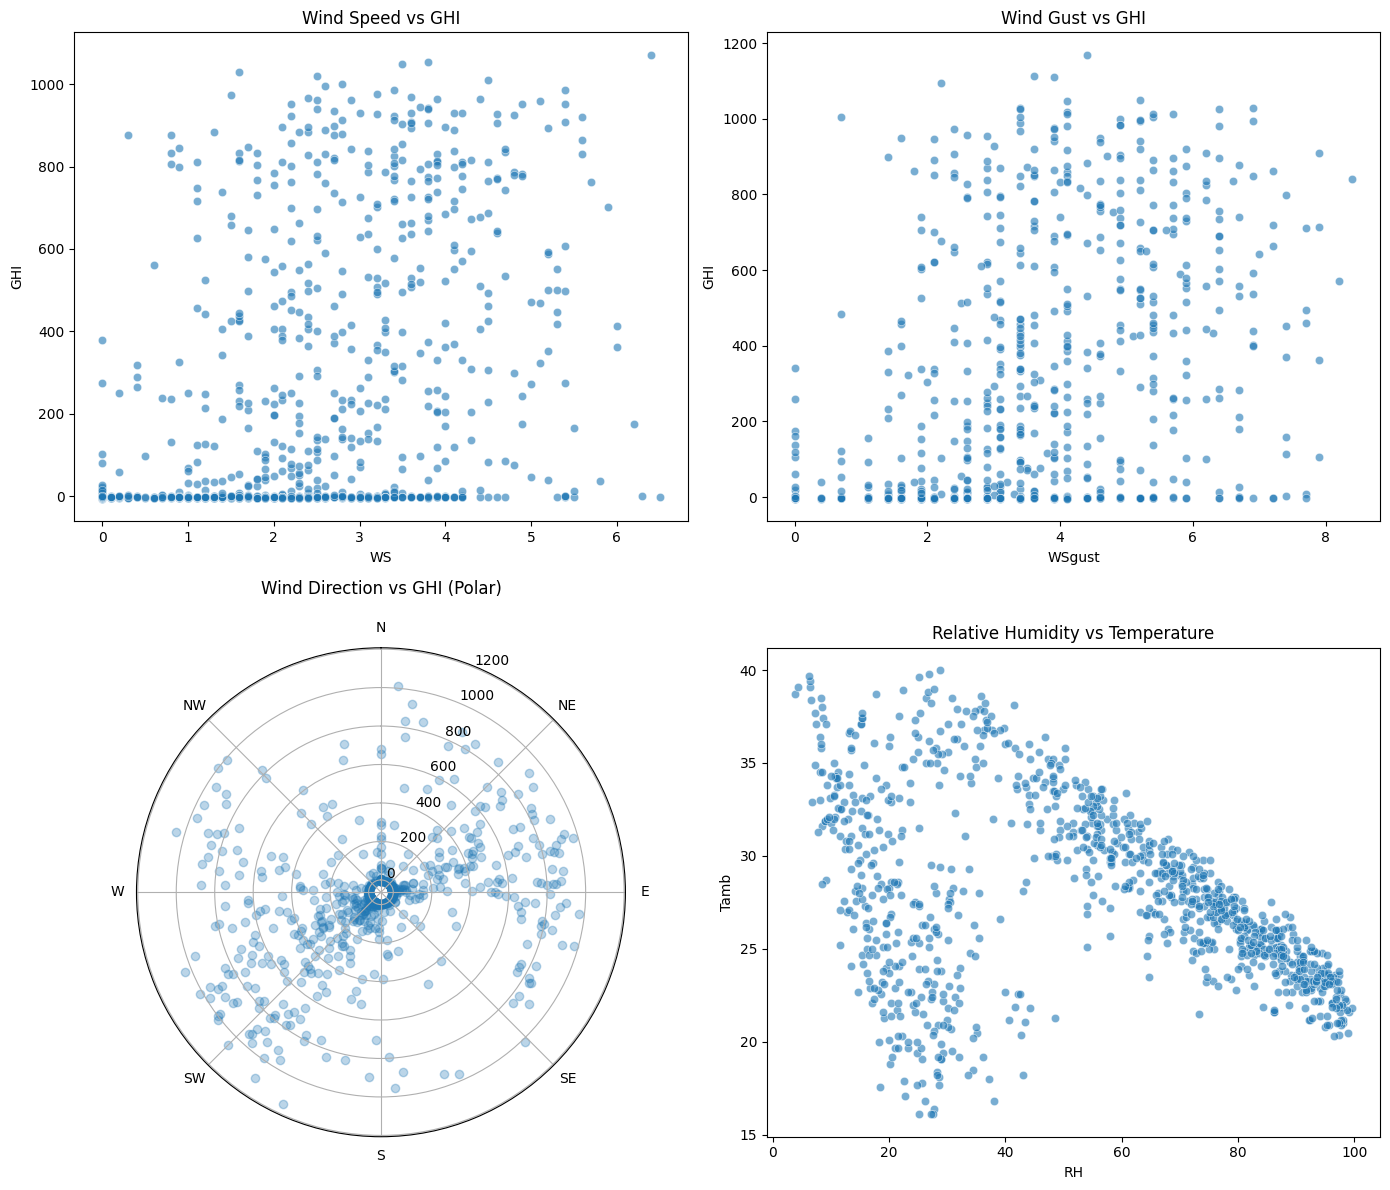

In [51]:
import numpy as np

# Create figure with polar subplot
plt.figure(figsize=(14, 12))

# 1. Regular scatter plots (WS, WSgust)
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_clean.sample(1000), x='WS', y='GHI', alpha=0.6)
plt.title('Wind Speed vs GHI')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df_clean.sample(1000), x='WSgust', y='GHI', alpha=0.6)
plt.title('Wind Gust vs GHI')

# 2. Correct polar plot for wind direction
ax = plt.subplot(2, 2, 3, projection='polar')  # <- Key change here
theta = np.radians(df_clean['WD'].dropna().sample(1000))
r = df_clean['GHI'].loc[theta.index]
ax.scatter(theta, r, alpha=0.3)
ax.set_title('Wind Direction vs GHI (Polar)', pad=20)
ax.set_theta_zero_location('N')  # Now works because it's a polar axis
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

# 3. RH vs Tamb
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_clean.sample(1000), x='RH', y='Tamb', alpha=0.6)
plt.title('Relative Humidity vs Temperature')

plt.tight_layout()
plt.show()

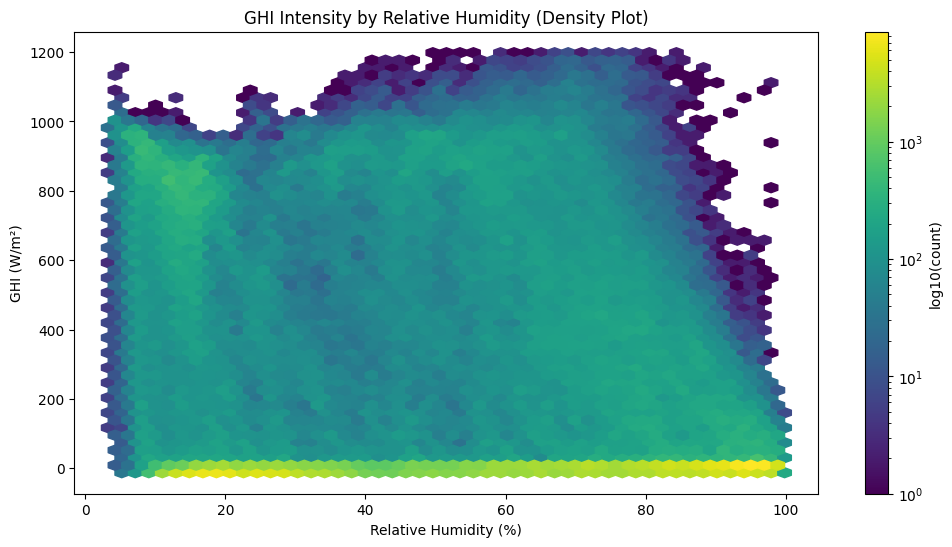

In [52]:
plt.figure(figsize=(12, 6))

# Hexbin plot for density visualization
hb = plt.hexbin(df_clean['RH'], df_clean['GHI'], 
                gridsize=50, cmap='viridis', bins='log')
plt.colorbar(hb, label='log10(count)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI Intensity by Relative Humidity (Density Plot)')
plt.show()

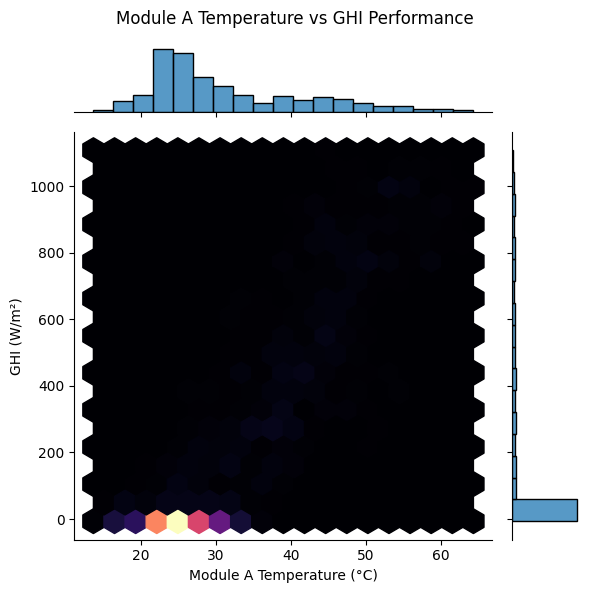

In [53]:
g = sns.jointplot(data=df_clean.sample(1000), x='TModA', y='GHI', 
                 kind='hex', cmap='magma')
g.fig.suptitle('Module A Temperature vs GHI Performance')
g.ax_joint.set_xlabel('Module A Temperature (°C)')
g.ax_joint.set_ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

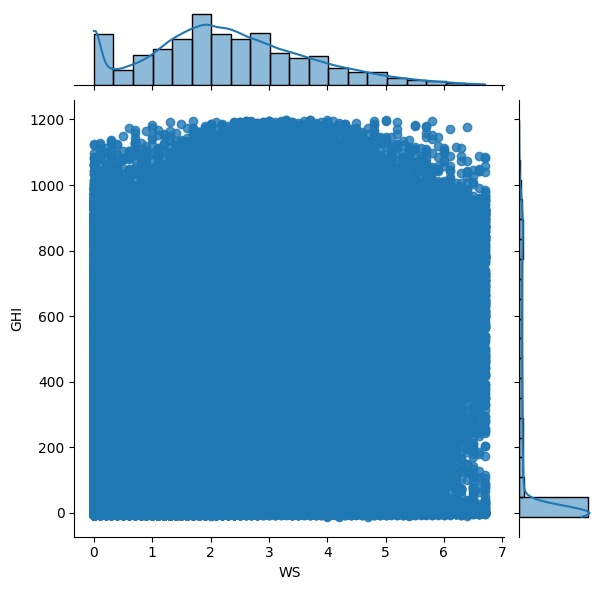

In [54]:
sns.jointplot(data=df_clean, x='WS', y='GHI', 
              kind='reg', marginal_kws={'bins': 20})

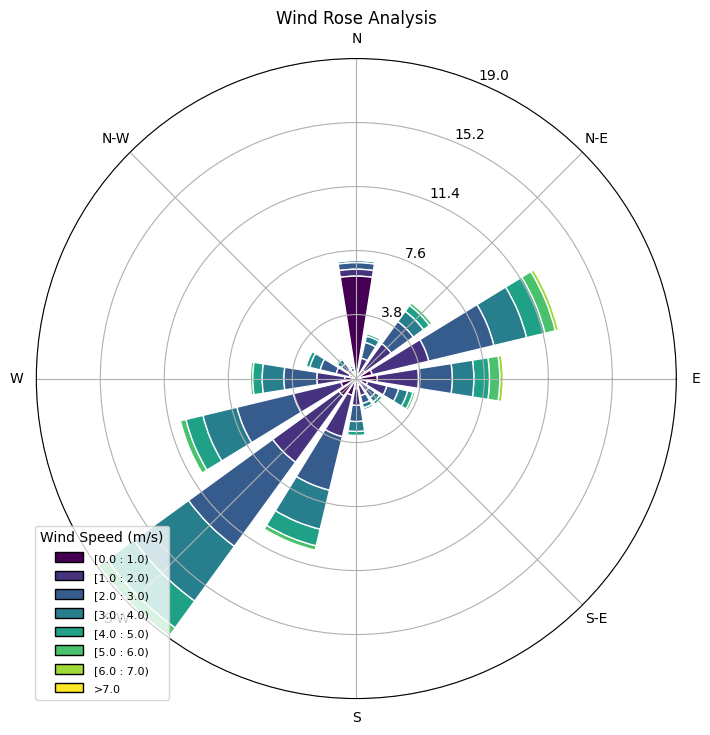

In [55]:
from windrose import WindroseAxes

# Clean wind data
wd = df_clean['WD'].dropna()
ws = df_clean['WS'].loc[wd.index]

# Create wind rose
fig = plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wd, ws, normed=True, bins=np.arange(0, 8, 1), opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose Analysis')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20060\2128716203.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_df = df_clean.groupby('WD_binned')['WS'].mean().reset_index()


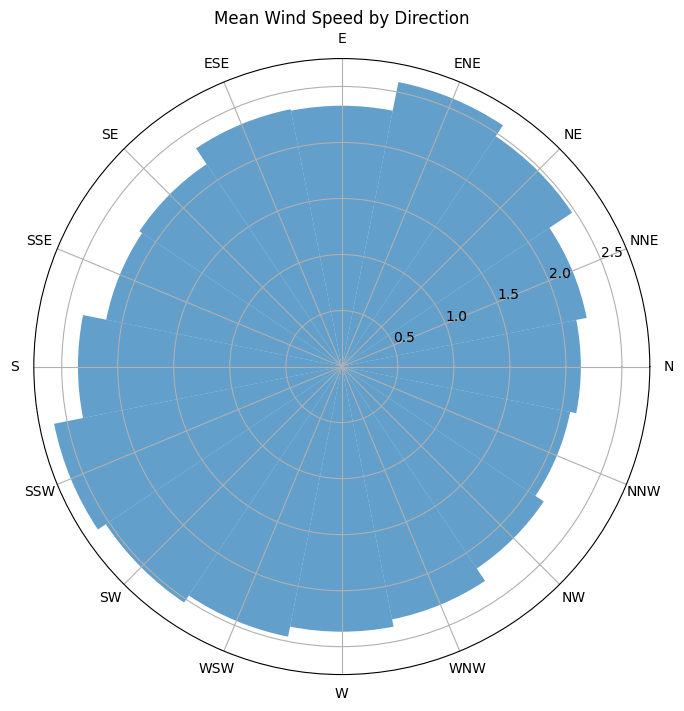

In [56]:
import numpy as np

# Bin wind directions
bins = np.linspace(0, 360, 17)  # 16 compass points
labels = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
          'S','SSW','SW','WSW','W','WNW','NW','NNW']
df_clean['WD_binned'] = pd.cut(df_clean['WD'], bins=bins, labels=labels)

# Calculate mean wind speed per direction
wind_df = df_clean.groupby('WD_binned')['WS'].mean().reset_index()

# Create radial plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
theta = np.linspace(0, 2*np.pi, 16, endpoint=False)
width = 2*np.pi/16
bars = ax.bar(theta, wind_df['WS'], width=width, alpha=0.7)

# Add compass labels
ax.set_xticks(theta)
ax.set_xticklabels(labels)
plt.title('Mean Wind Speed by Direction')
plt.show()

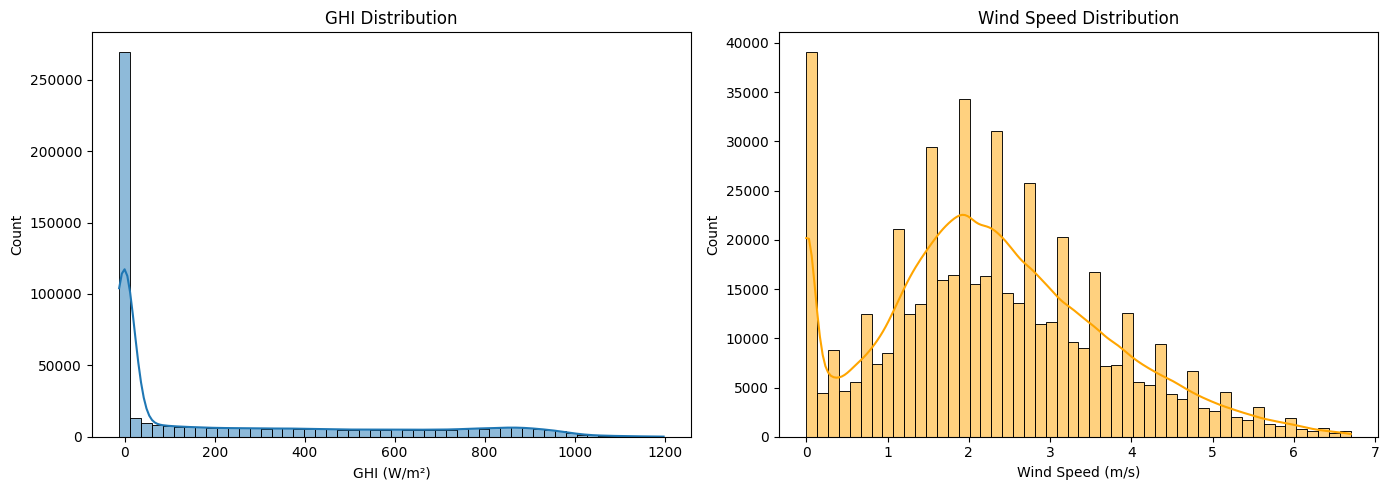

In [57]:
plt.figure(figsize=(14, 5))

# GHI Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=50, kde=True)
plt.title('GHI Distribution')
plt.xlabel('GHI (W/m²)')

# Wind Speed Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=50, kde=True, color='orange')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

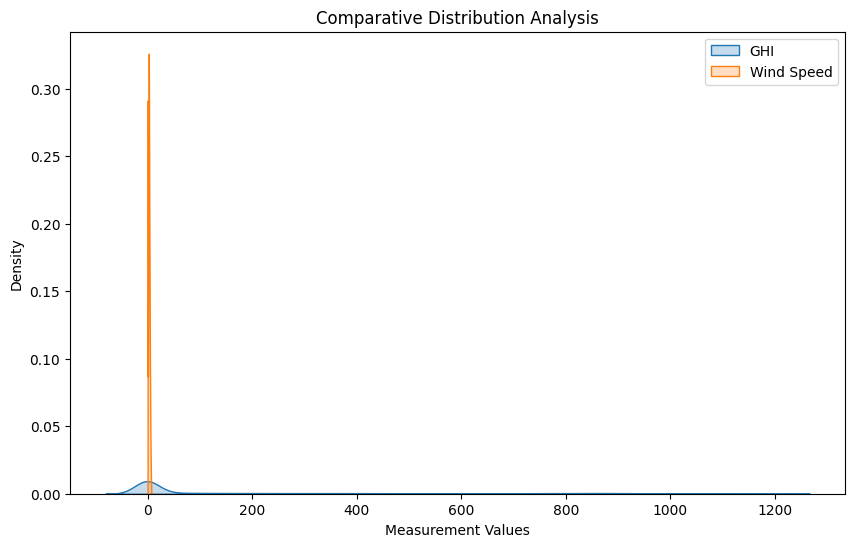

In [58]:
# Combined distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean, x='GHI', label='GHI', fill=True)
sns.kdeplot(data=df_clean, x='WS', label='Wind Speed', fill=True)
plt.title('Comparative Distribution Analysis')
plt.xlabel('Measurement Values')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Diurnal Wind Speed Patterns')

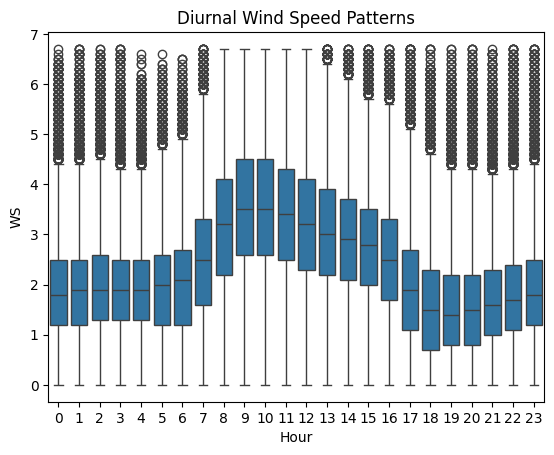

In [59]:
# Wind patterns by hour
df_clean['Hour'] = df_clean.index.hour
sns.boxplot(data=df_clean, x='Hour', y='WS')
plt.title('Diurnal Wind Speed Patterns')

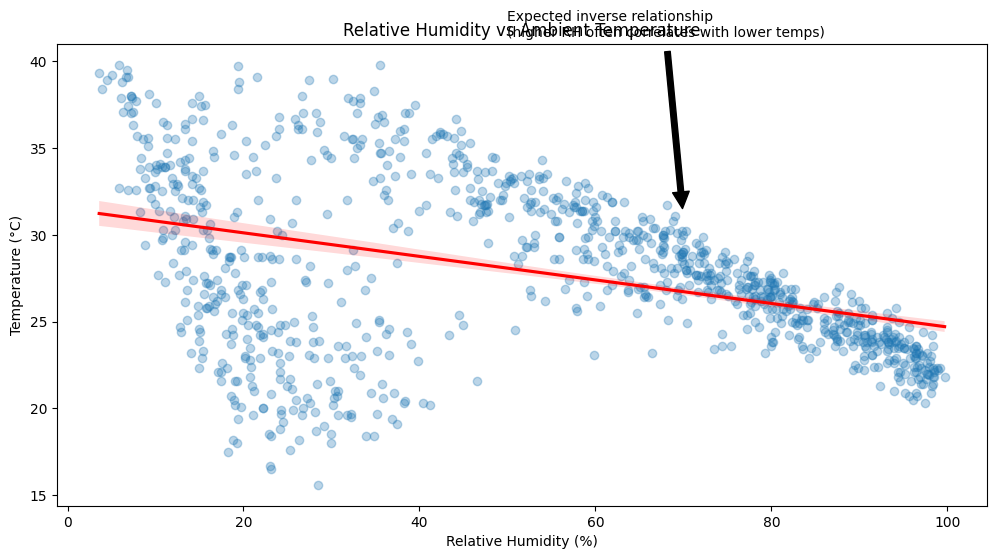

In [60]:
plt.figure(figsize=(12, 6))

# Scatter plot with regression
sns.regplot(data=df_clean.sample(1000), x='RH', y='Tamb', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

# Annotate key observations
plt.annotate('Expected inverse relationship\n(higher RH often correlates with lower temps)',
             xy=(70, df_clean['Tamb'].quantile(0.75)),
             xytext=(50, df_clean['Tamb'].max()),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

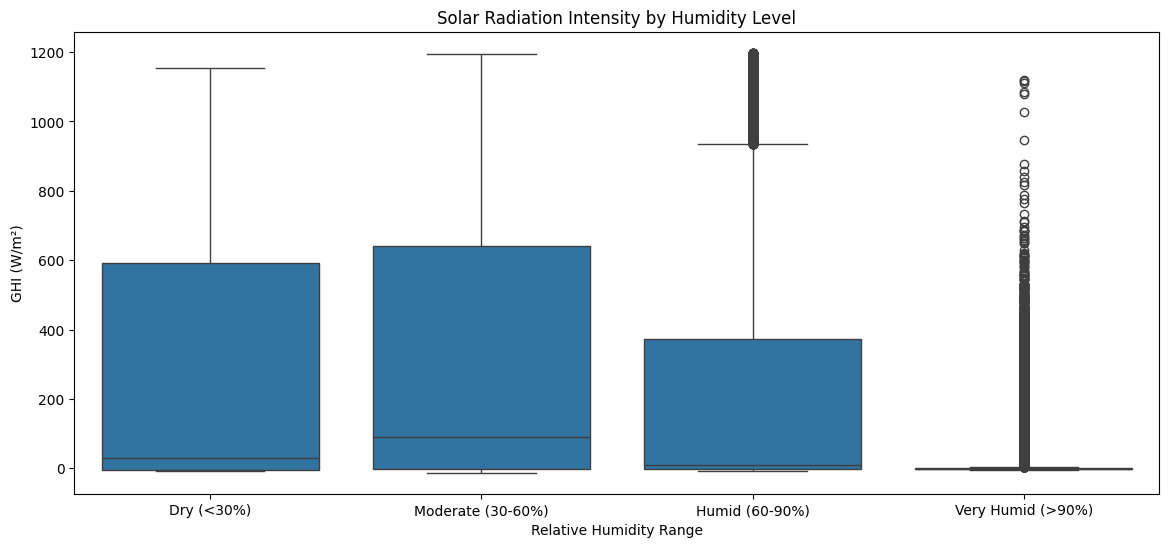

In [61]:
# Create RH categories
df_clean['RH_Category'] = pd.cut(df_clean['RH'],
                               bins=[0, 30, 60, 90, 100],
                               labels=['Dry (<30%)', 'Moderate (30-60%)',
                                      'Humid (60-90%)', 'Very Humid (>90%)'])

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean, x='RH_Category', y='GHI')
plt.title('Solar Radiation Intensity by Humidity Level')
plt.xlabel('Relative Humidity Range')
plt.ylabel('GHI (W/m²)')
plt.show()

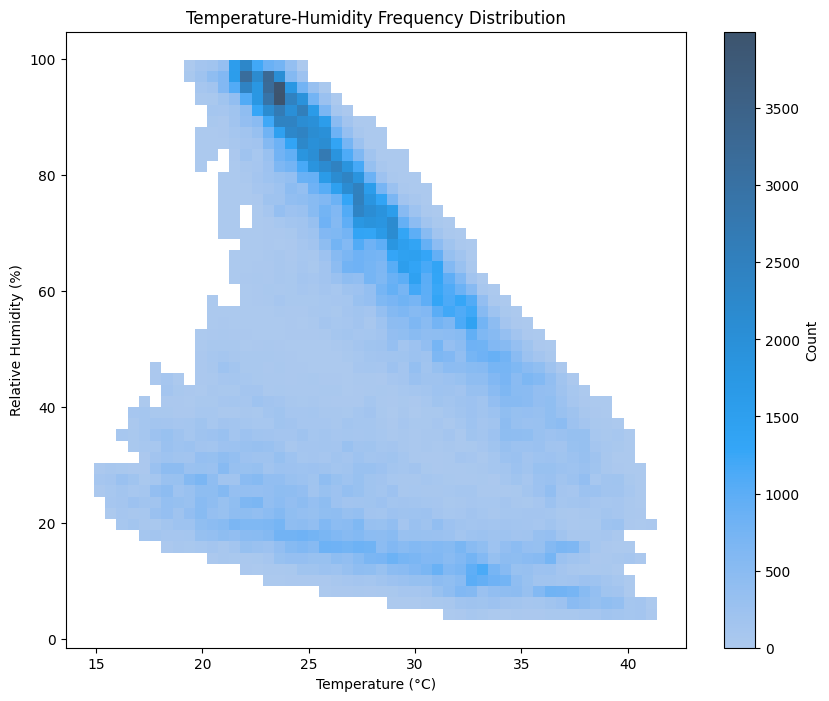

In [62]:
# Create 2D histogram
plt.figure(figsize=(10, 8))
sns.histplot(data=df_clean, x='Tamb', y='RH', 
             bins=50, cbar=True, cbar_kws={'label':'Count'})
plt.title('Temperature-Humidity Frequency Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

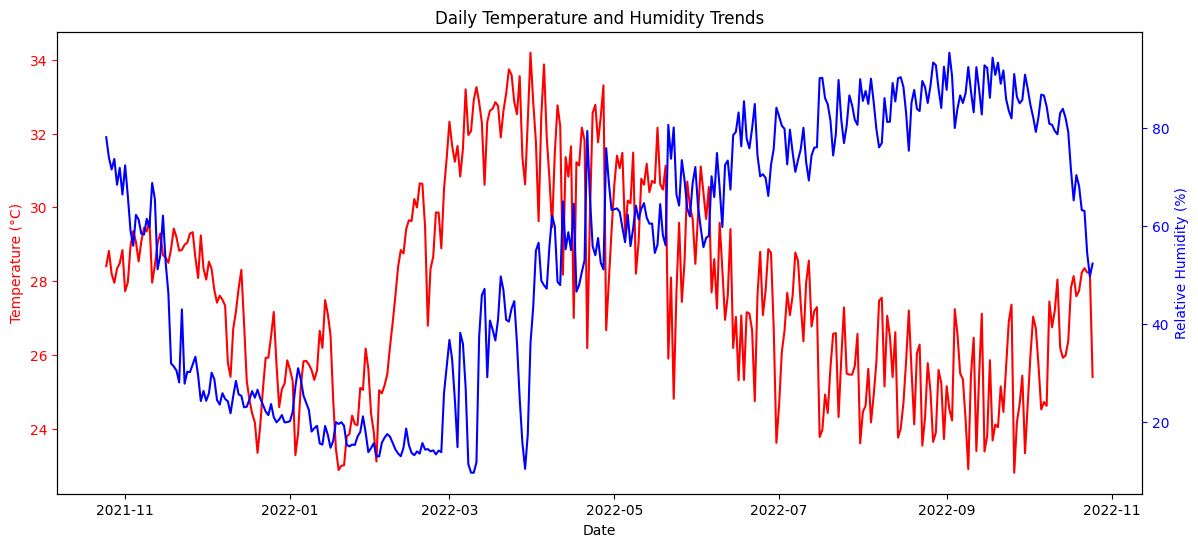

In [63]:
# First ensure we're working with numeric columns only for resampling
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Resample to daily averages (excluding categorical columns)
daily_df = df_clean[numeric_cols].resample('D').mean()

# Now create the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Temperature plot (red)
ax1.plot(daily_df.index, daily_df['Tamb'], 'r-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='r')
ax1.tick_params('y', colors='r')

# RH plot (blue) - using right axis
ax2 = ax1.twinx()
ax2.plot(daily_df.index, daily_df['RH'], 'b-')
ax2.set_ylabel('Relative Humidity (%)', color='b')
ax2.tick_params('y', colors='b')

plt.title('Daily Temperature and Humidity Trends')
plt.show()

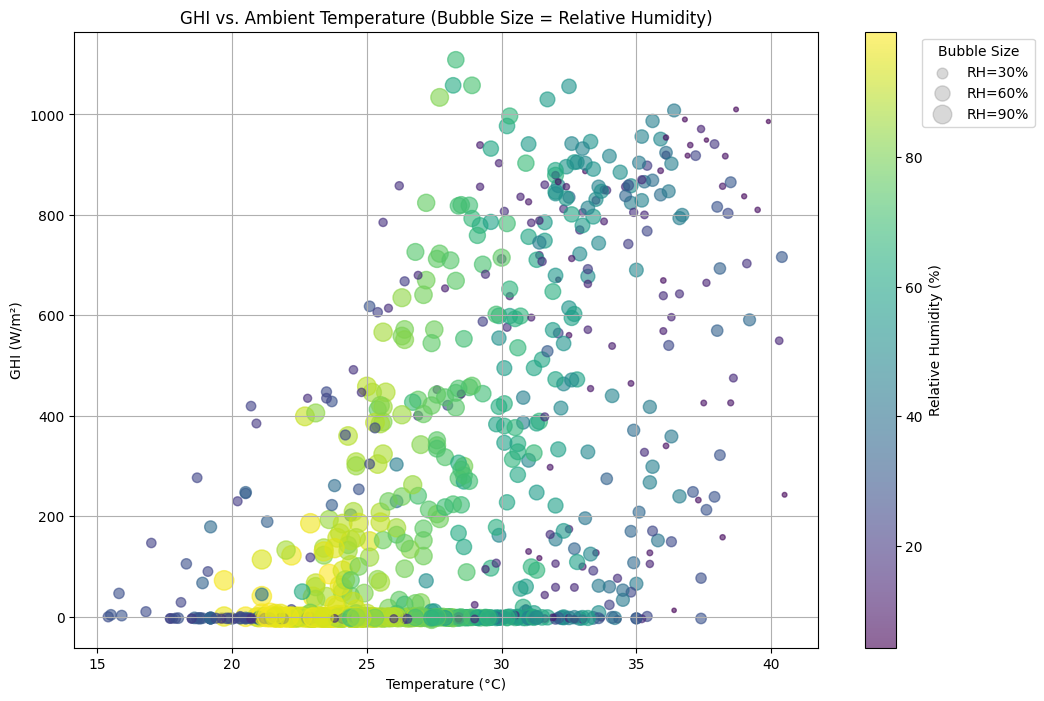

In [64]:
plt.figure(figsize=(12, 8))

# Sample data for better visualization (optional for large datasets)
plot_data = df_clean.sample(1000)  

# Create bubble chart
scatter = plt.scatter(
    x=plot_data['Tamb'],
    y=plot_data['GHI'],
    s=plot_data['RH']*2,  # Scale RH for visible bubbles
    c=plot_data['RH'],    # Color by RH
    alpha=0.6,
    cmap='viridis'
)

# Add labels and title
plt.title('GHI vs. Ambient Temperature (Bubble Size = Relative Humidity)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Relative Humidity (%)')

# Add legend for bubble sizes
for rh in [30, 60, 90]:
    plt.scatter([], [], c='gray', alpha=0.3, s=rh*2, label=f'RH={rh}%')
plt.legend(title='Bubble Size', bbox_to_anchor=(1.3, 1))

plt.grid(True)
plt.show()

c:\Users\HP\Desktop\10 Academy - KAIM\Week-0\solar-challenge-week1\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


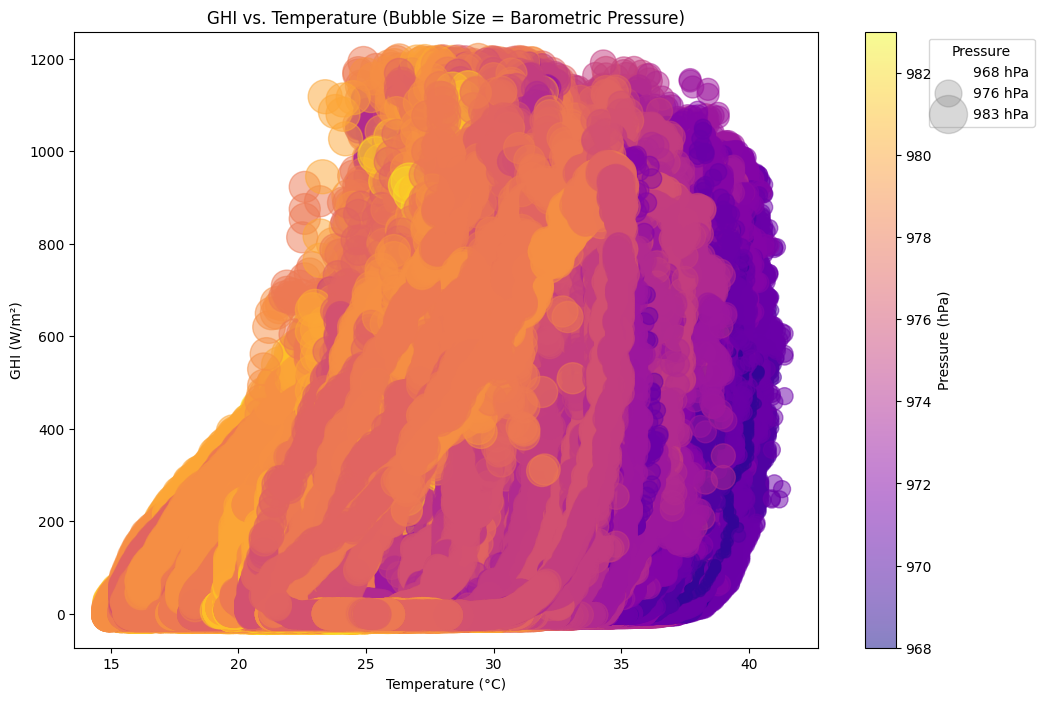

In [65]:
plt.figure(figsize=(12, 8))

# Normalize BP for better bubble sizes
bp_normalized = (df_clean['BP'] - df_clean['BP'].min()) * 50

scatter = plt.scatter(
    x=df_clean['Tamb'],
    y=df_clean['GHI'],
    s=bp_normalized,
    c=df_clean['BP'],
    alpha=0.5,
    cmap='plasma'
)

plt.title('GHI vs. Temperature (Bubble Size = Barometric Pressure)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')

cbar = plt.colorbar(scatter)
cbar.set_label('Pressure (hPa)')

# Add reference bubbles for legend
bp_min = df_clean['BP'].min()
bp_max = df_clean['BP'].max()
for bp in [bp_min, (bp_min+bp_max)/2, bp_max]:
    size = (bp - bp_min) * 50
    plt.scatter([], [], c='gray', alpha=0.3, s=size, 
                label=f'{bp:.0f} hPa')
plt.legend(title='Pressure', bbox_to_anchor=(1.3, 1))

plt.show()

In [66]:
# Plot only daytime hours
daytime = df_clean.between_time('06:00', '18:00')